# Batch verification

Finding: Batch verification uses x86_64 SIMD instruction. It's limited to 64 signatures; that is 95 servers. 64 is more than 2/3 of 95.

Issue: Batch verification is only faster after a certain number of batches.

let $n$ be the number of signatures that can be validated in a batch.

- $n < k$: Do not use batch verification
- $n \geq k$: Use batch verification

That number is $k=4$.



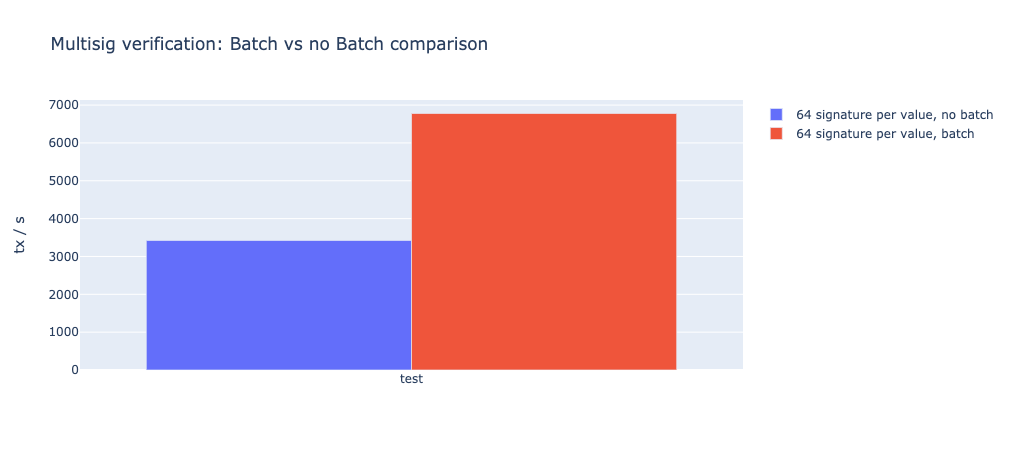

In [13]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd

df = pd.read_csv("tests.csv")

fig = go.Figure(data=[
    #go.Bar(name='1 signature per value, no batch', x=df["name"], y=1/(df["1sig_nobatch"]*10**-9)),
    go.Bar(name='64 signature per value, no batch', x=df["name"], y=1/(df["64sig_nobatch"]*10**-9)),
    go.Bar(name='64 signature per value, batch', x=df["name"], y=1/(df["64sig_batch"]*10**-9)),
])
# Change the bar mode
fig.update_layout(title="Multisig verification: Batch vs no Batch comparison", barmode='group', yaxis_title="tx / s")
fig.update_layout(xaxis_type='category', yaxis_type='linear')
fig.show()

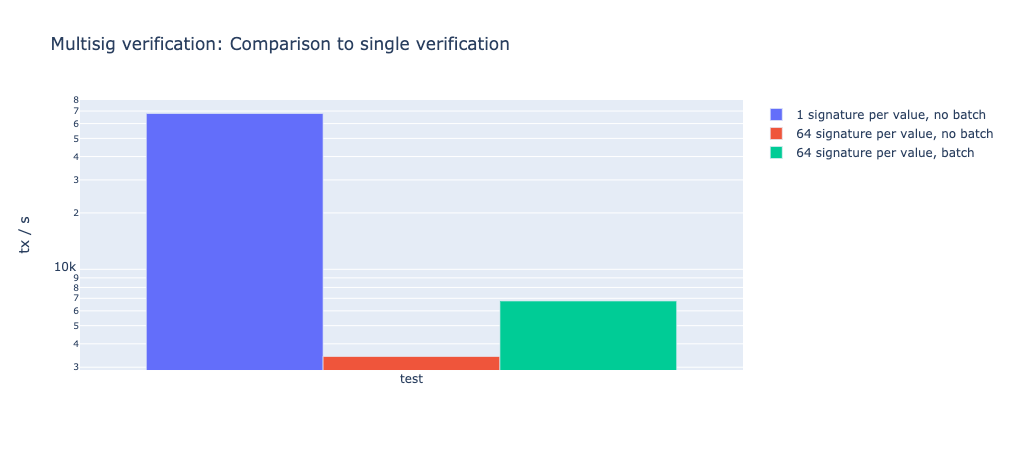

In [10]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd

df = pd.read_csv("tests.csv")

fig = go.Figure(data=[
    go.Bar(name='1 signature per value, no batch', x=df["name"], y=1/(df["1sig_nobatch"]*10**-9)),
    go.Bar(name='64 signature per value, no batch', x=df["name"], y=1/(df["64sig_nobatch"]*10**-9)),
    go.Bar(name='64 signature per value, batch', x=df["name"], y=1/(df["64sig_batch"]*10**-9)),
])
# Change the bar mode
fig.update_layout(title="Multisig verification: Comparison to single verification", barmode='group', yaxis_title="tx / s")
fig.update_layout(xaxis_type='category', yaxis_type='log')
fig.show()

## ed25519ph (pre-hash version)

Verification and signing of pre-hashed messages is available. Using this now to reduce computation time.